In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats

In [2]:
import re
party_re = re.compile(r'(\d+(\.\d+)?)/10')
def get_party(txt):
    match = party_re.search(txt)
    if match:
        return float(match.group(1))
    else:
        return None

In [3]:
def to_timestamp(a):
    return a.timestamp()

In [4]:
def funct(x):
    return intercept + slope*x['timestamp'] - x['score']

In [5]:
import pandas as pd
filename = 'dog_rates_tweets.csv'
tweets = pd.read_csv(filename, parse_dates=[1])

In [6]:
tweets['score'] = tweets['text'].apply(get_party)
tweets['timestamp'] = tweets['created_at'].apply(to_timestamp)
tweets.sort_values('timestamp', ascending=True, inplace=True)
tweets = tweets.dropna() # Drop the columns where at least one element is missing.
tweets = tweets[(tweets['score'] <= 20) & (tweets['score'] >= -20)]
tweets

,id,created_at,text,score,timestamp
5814,698907974262222848,2016-02-14 16:33:40,"b""This dog is never sure if he's doing the rig...",10.0,1.455468e+09
5812,698953797952008193,2016-02-14 19:35:46,b'Meet CeCe. She wanted to take a selfie befor...,11.0,1.455479e+09
5811,698989035503689728,2016-02-14 21:55:47,b'This is Oliver. He does toe touches in his s...,13.0,1.455487e+09
5810,699036661657767936,2016-02-15 01:05:02,b'HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10...,13.0,1.455498e+09
5808,699060279947165696,2016-02-15 02:38:53,b'This is Yukon. He pukes rainbows. 12/10 magi...,12.0,1.455504e+09
5805,699072405256409088,2016-02-15 03:27:04,b'ERMAHGERD 12/10 please enjoy https://t.co/7W...,12.0,1.455507e+09
5804,699079609774645248,2016-02-15 03:55:41,"b""Meet Reagan. He's a Persnicketus Derpson. Gr...",8.0,1.455509e+09
5803,699088579889332224,2016-02-15 04:31:20,"b""This is Charl. He's a bully. Chucks that dum...",3.0,1.455511e+09
5801,699323444782047232,2016-02-15 20:04:36,"b'""I\'m bathing the children what do you want?...",10.0,1.455567e+09
5800,699370870310113280,2016-02-15 23:13:03,"b""Say hello to Calbert. He doesn't have enough...",11.0,1.455578e+09


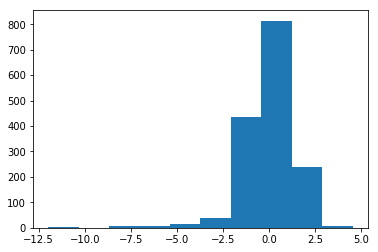

In [7]:
timeStampData = tweets['timestamp']
scoreData = tweets['score']
reg = stats.linregress(timeStampData, scoreData)
p_value = reg.pvalue
intercept = reg.intercept
slope = reg.slope
residuals = tweets['score'] - (reg.slope*timeStampData + reg.intercept)
residuals
plt.hist(residuals)
plt.show()

In [8]:
filename = 'dog_rates_tweets.csv'
tweets = pd.read_csv(filename, parse_dates=[1])
tweets['score'] = tweets['text'].apply(get_party)
tweets['timestamp'] = tweets['created_at'].apply(to_timestamp)
tweets.sort_values('timestamp', ascending=True, inplace=True)
tweets = tweets.dropna() # Drop the columns where at least one element is missing.
tweets = tweets[(tweets['score'] <= 20) & (tweets['score'] >= -20)]
p_value

1.0836168506032591e-104

In [9]:
tweets['created_at'].timestamp()

AttributeError: 'Series' object has no attribute 'timestamp'